#IPL 2008-2023: Data Analysis and Hypothesis Testing

The Indian Premier League (IPL) is one of the most competitive T20 leagues globally, known for its unpredictable results and strategic gameplay. In this project, we analyze ball-by-ball data from IPL seasons 2008 to 2023 to uncover patterns and test hypotheses about match outcomes.

Goal:

To statistically analyze IPL (2008–2023) data and uncover how toss outcomes, innings strategies, and match decisions impact winning chances, supported by hypothesis testing and visual insights.

We will focus on:
- Toss win vs match win relationship
- Difference in scoring patterns between 1st and 2nd innings
- Impact of toss decision (bat or field) on match winning
- How the trend evolved over time (era comparison)

Let's dive in!

# Data Loading and Preprocessing

In [ ]:
# 1. Importing libraries
import pandas as pd
import numpy as np

# 2. Loading and Merging datasets
deliveries = pd.read_csv('/content/deliveries.csv')
matches = pd.read_csv('/content/matches.csv')
combined = deliveries.merge(matches, how='left', on='matchId')
print("Combined Dataset Shape:", combined.shape)
print(combined.head())

# 3. Basic Cleaning
# Fill NaN values in 'dismissal_kind', 'player_dismissed' with 'None'
combined['dismissal_kind'] = combined['dismissal_kind'].fillna('None')
combined['player_dismissed'] = combined['player_dismissed'].fillna('None')
# Making sure 'date' column is datetime
combined['date_x'] = pd.to_datetime(combined['date_x'])
print("\nData Types After Cleaning:")
print(combined.dtypes)


Combined Dataset Shape: (243817, 47)
   matchId  inning  over_ball  over  ball           batting_team  \
0   335982       1        0.1     0     1  Kolkata Knight Riders   
1   335982       1        0.2     0     2  Kolkata Knight Riders   
2   335982       1        0.3     0     3  Kolkata Knight Riders   
3   335982       1        0.4     0     4  Kolkata Knight Riders   
4   335982       1        0.5     0     5  Kolkata Knight Riders   

                  bowling_team      batsman  non_striker   bowler  ...  \
0  Royal Challengers Bangalore   SC Ganguly  BB McCullum  P Kumar  ...   
1  Royal Challengers Bangalore  BB McCullum   SC Ganguly  P Kumar  ...   
2  Royal Challengers Bangalore  BB McCullum   SC Ganguly  P Kumar  ...   
3  Royal Challengers Bangalore  BB McCullum   SC Ganguly  P Kumar  ...   
4  Royal Challengers Bangalore  BB McCullum   SC Ganguly  P Kumar  ...   

   winner_wickets                  toss_winner  toss_decision  date2  \
0             NaN  Royal Challengers 

#Hypothesis Testing

# First Hypothesis - Toss Winning Impact

## Does winning the toss increase the chances of winning the match?

Setting Hypothesis:

H₀ (Null): Winning the toss does not significantly affect match outcome.

H₁ (Alternative): Winning the toss does significantly affect match outcome.


In [ ]:
# Step 1: Creating a new column 'toss_win_equals_match_win'
matches['toss_win_equals_match_win'] = np.where(matches['toss_winner'] == matches['winner'], 'Yes', 'No')

# Step 2: Creating a contingency table
contingency_table = matches['toss_win_equals_match_win'].value_counts()
print("Contingency Table:\n", contingency_table)

# Step 3: Performing Chi-Square Test
from scipy.stats import chi2_contingency
# Need to reshape it into a 2D array for chi2 test
observed = [[contingency_table['Yes'], contingency_table['No']]]
chi2, p_value, dof, expected = chi2_contingency(observed)
print("\nChi2 Value:", chi2)
print("P-Value:", p_value)

# Step 4: Conclusion
alpha = 0.05  # 95% confidence level
if p_value < alpha:
    print("\n✅ Reject Null Hypothesis: Toss winning and match winning are dependent.")
else:
    print("\n❌ Fail to Reject Null Hypothesis: Toss winning and match winning are independent.")


Contingency Table:
 toss_win_equals_match_win
Yes    517
No     507
Name: count, dtype: int64

Chi2 Value: 0.0
P-Value: 1.0

❌ Fail to Reject Null Hypothesis: Toss winning and match winning are independent.


##Insights:

Toss Winner = Match Winner: 517 times

Toss Loser = Match Winner: 507 times

##Conclusion:

We fail to reject the null hypothesis.

Toss winning and match winning are statistically independent.

In simple words: Winning the toss does not guarantee winning the match!



# Hypothesis 2: Difference in scoring patterns between 1st and 2nd innings

## Is there a significant difference in runs scored in 1st innings vs 2nd innings?

Setting Hypothesis:

H₀ (Null): The mean runs in 1st innings = mean runs in 2nd innings (no difference).

H₁ (Alternative): The mean runs in 1st innings ≠ mean runs in 2nd innings (there is a significant difference).

In [ ]:
# Step 1: Extracting total runs scored per innings
innings_total = deliveries.groupby(['matchId', 'inning'])['batsman_runs'].sum().reset_index()

# Step 2: Separating 1st innings and 2nd innings scores
first_innings_runs = innings_total[innings_total['inning'] == 1]['batsman_runs']
second_innings_runs = innings_total[innings_total['inning'] == 2]['batsman_runs']

# Step 3: Performing Independent Two-Sample T-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(first_innings_runs, second_innings_runs, equal_var=False)  # Welch's t-test
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Step 4: Conclusion
alpha = 0.05
if p_value < alpha:
    print("\n✅ Reject Null Hypothesis: Significant difference between 1st and 2nd innings runs.")
else:
    print("\n❌ Fail to Reject Null Hypothesis: No significant difference between 1st and 2nd innings runs.")


T-Statistic: 9.497805953035224
P-Value: 5.762627151292451e-21

✅ Reject Null Hypothesis: Significant difference between 1st and 2nd innings runs.


##Let's visualize!

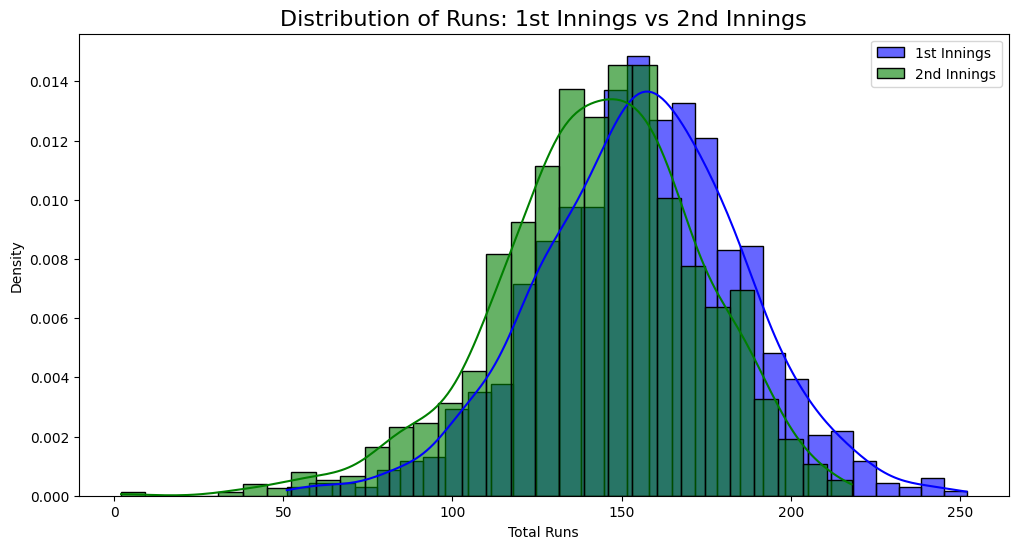

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. KDE Plot + Histogram
plt.figure(figsize=(12,6))
sns.histplot(first_innings_runs, color='blue', label='1st Innings', kde=True, stat='density', bins=30, alpha=0.6)
sns.histplot(second_innings_runs, color='green', label='2nd Innings', kde=True, stat='density', bins=30, alpha=0.6)
plt.title('Distribution of Runs: 1st Innings vs 2nd Innings', fontsize=16)
plt.xlabel('Total Runs')
plt.ylabel('Density')
plt.legend()
plt.show()


Histogram + KDE (Distribution Plot)

1st Innings scores are slightly higher on average compared to 2nd Innings.

Both distributions are approximately normal (bell-shaped), but 1st innings has a wider spread (more runs above 200).

The peak (mode) for 2nd innings is slightly shifted left — meaning teams generally score a little less when chasing.

Density tails:

1st innings has a longer right tail → some very high-scoring innings.

2nd innings has sharper drop-offs beyond 200 runs.

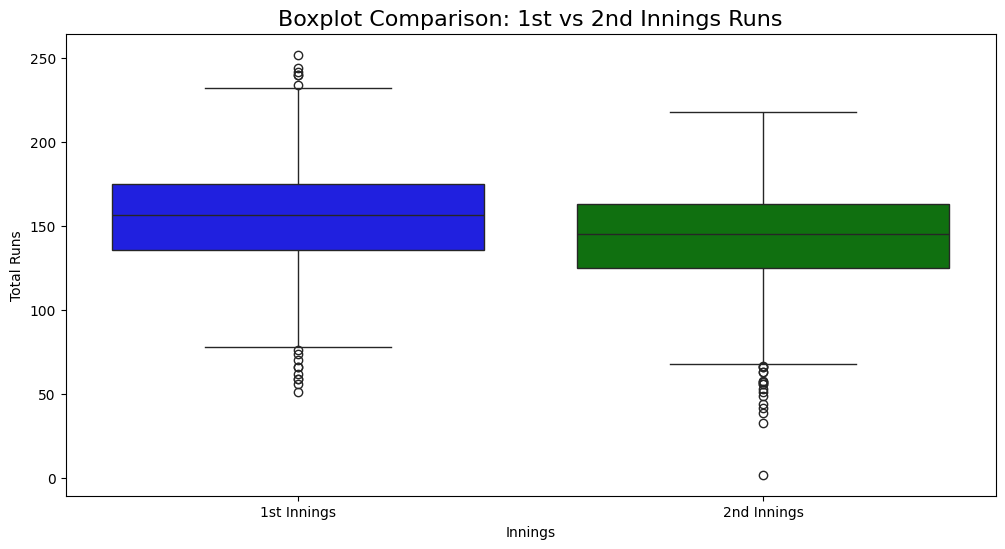

In [ ]:
# 2. Boxplot
#Combining runs and innings labels
innings_runs = pd.DataFrame({
    'Runs': first_innings_runs.tolist() + second_innings_runs.tolist(),
    'Innings': ['1st Innings'] * len(first_innings_runs) + ['2nd Innings'] * len(second_innings_runs)
})
plt.figure(figsize=(12,6))
sns.boxplot(x='Innings', y='Runs', hue='Innings', data=innings_runs, palette=['blue', 'green'], dodge=False, legend=False)
plt.title('Boxplot Comparison: 1st vs 2nd Innings Runs', fontsize=16)
plt.ylabel('Total Runs')
plt.show()

Median: 1st innings median is higher than 2nd innings.

IQR (Interquartile Range): 1st innings scores are more spread out (larger box).

Outliers: 2nd innings has more low-end outliers (scores close to 0 or very low totals), suggesting teams often collapse under pressure while chasing.

Upper ranges: 1st innings sometimes reaches 250+, whereas 2nd innings rarely touches that.



##Conclusion:

There is a significant difference in runs scored in 1st innings vs 2nd innings.

Batting first usually results in higher and more consistent totals.

Chasing teams are more vulnerable to low scores and failures.

Strategic implication: Winning the toss and batting first could be advantageous, especially if the pitch deteriorates or pressure mounts later.

# Hypothesis 3 - Impact of toss decision (bat or field) on match winning

## Does winning toss and choosing to field increase the chance of winning?

Setting Hypothesis:

H₀(Null): Toss decision (bat or field) has no effect on match winning.

H₁(Alternative): Choosing to field after winning toss increases chances of winning.

In [ ]:
# First, find teams who won the toss
matches['toss_winner_decision'] = matches['toss_winner'] + '-' + matches['toss_decision']

# Create a column: Did toss winner also win the match?
matches['toss_win_match_win'] = matches['toss_winner'] == matches['winner']

# Let's focus only on toss_winners
toss_df = matches[['toss_winner','toss_decision', 'toss_win_match_win']]

# Display first few rows to verify
toss_df.head()


,toss_winner,toss_decision,toss_win_match_win
0,Royal Challengers Bangalore,field,False
1,Chennai Super Kings,bat,True
2,Rajasthan Royals,bat,False
3,Mumbai Indians,bat,False
4,Deccan Chargers,bat,False


In [ ]:
#creating contingency table
contingency_table = pd.crosstab(toss_df['toss_decision'], toss_df['toss_win_match_win'])
print(contingency_table)


toss_win_match_win  False  True 
toss_decision                   
bat                   205    167
field                 302    350


In [ ]:
# Chi-Square Test
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Value: {chi2}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("✅ Reject Null Hypothesis: Toss decision impacts match winning!")
else:
    print("❌ Fail to Reject Null Hypothesis: Toss decision does NOT impact match winning.")


Chi2 Value: 6.971152907646047
P-Value: 0.008283411054961028
✅ Reject Null Hypothesis: Toss decision impacts match winning!


##Insights:

Teams who choose to field after winning toss have a better win record

Chi2 Value: 6.97, P-Value: 0.008 → (less than 0.05 → Significant!)

Interpretation: Toss decision (bat/field) does impact match winning!

##Conclusion:

Choosing to field first gives a better chance of winning in IPL!

## Let's visualize to understand better!

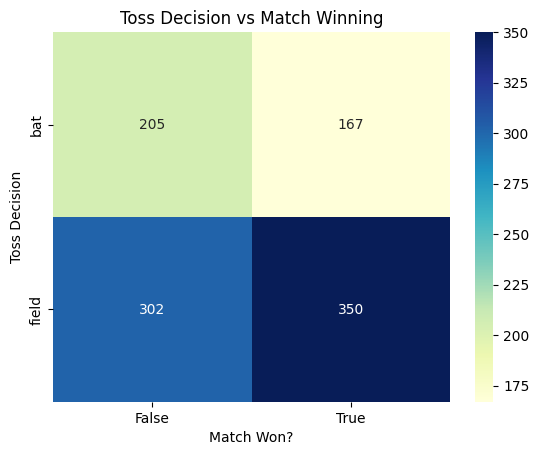

In [ ]:
# Create a heatmap of the contingency table
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Toss Decision vs Match Winning')
plt.xlabel('Match Won?')
plt.ylabel('Toss Decision')
plt.show()


# Hypothesis 4: How the trend evolved over time (era comparison)

## Is chasing (fielding first) more successful in recent IPL seasons (e.g., after 2015)?



In [ ]:
# Converting date to datetime
matches['date'] = pd.to_datetime(matches['date'])

# Creating ERA column
matches['era'] = matches['date'].apply(lambda x: '2008-2015' if x.year <= 2015 else '2016-2023')

# Filtering only toss winners
toss_df = matches[['toss_winner', 'toss_decision', 'winner', 'toss_win_match_win', 'era']]

# Grouping by ERA and Toss Decision
era_summary = toss_df.groupby(['era', 'toss_decision'])['toss_win_match_win'].value_counts().unstack().fillna(0)
print(era_summary)


toss_win_match_win       False  True 
era       toss_decision              
2008-2015 bat              136    115
          field            127    139
2016-2023 bat               69     52
          field            175    211


##Let's Visualize!

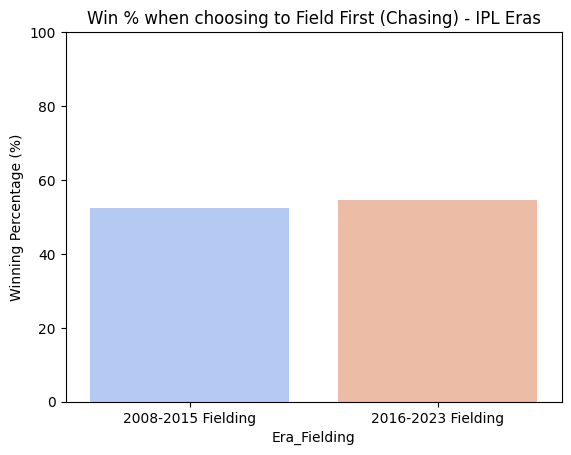

In [ ]:
# Prepare data for plotting
plot_data = {
    '2008-2015 Fielding': 139 / (127+139) * 100,
    '2016-2023 Fielding': 211 / (175+211) * 100
}
# Make a DataFrame
df_plot = pd.DataFrame({
    'Era_Fielding': list(plot_data.keys()),
    'Winning_Percentage': list(plot_data.values())
})
sns.barplot(data=df_plot, x='Era_Fielding', y='Winning_Percentage', hue='Era_Fielding', palette='coolwarm', dodge=False, legend=False)
plt.title('Win % when choosing to Field First (Chasing) - IPL Eras')
plt.ylabel('Winning Percentage (%)')
plt.ylim(0, 100)
plt.show()


##Insights:

Chasing (fielding first) became even more successful in modern IPL seasons!

Before 2015: 52.3% win rate when fielding first

After 2015: 54.7% win rate when fielding first

Dew factor and batting conditions at night are likely big reasons.

##Conclusion:

Toss winners choosing to field had higher winning percentage after 2015.

Supports the idea that chasing advantage grew stronger over time.



#Project Conclusion:

My analyses revealed that winning the toss does not guarantee match victory. Chasing has emerged as a more successful strategy, especially in recent IPL seasons.